<table>
    <tr>
      <td>Grado en Ingeniería de Datos e Inteligencia Artificial - Facultad de Informática - UCM
      </td>
      <td>
      <img src="https://biblioteca.ucm.es/data/cont/media/www/pag-88746//escudo.jpg"  width=50/>
      </td>
     </tr>
</table>




# Outliers - Boxplots



### Índice
[Intro](#Introducción)<br>
[Ejemplo](#Ejemplo)<br>
[Visualizando outliers](#Visualizando)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[Histogramas](#Histogramas)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[Boxplots](#Boxplots)<br>
[Métodos numéricos](#Numéricos)<br>
[Outliers en varias dimensiones](#Multivariante)<br>
[Bibliografía](#Bibliografía)<br>


<a name="Intro"></a>
## Introducción
¿Qué es un outlier? Una posible definición sería 

*un valor que se desvía tanto del resto que lleva a sospechar que se ha producido a través de un mecanismo diferente* 

Ese mecanismo diferente puede ser un error en la toma de datos o una circunstancia especial. 

Al considerar outliers no debemos utilizar la media y la desviación típica, porque son valores que se ven muy afectados por los propios outliers. En su lugar utilizaremos medidas más *robustas* como la mediana. Hay multitud de métodos dado que se trata de un problema recurrente y fundamental. Aquí vamos a ver dos tipos de métodos:

* Visuales
* Estadísticos

Para más detalles ver la [bibliografía](#Bibliografía)

<a name="Ejemplo"></a>
## Ejemplo

Como ejemplo vamos a ver las estadísticas de varios pilotos de Fórmula 1 en el gran premio de Arabia Saudita en marzo de 2023. 

Estos datos nos los proporciona la siguiente librería


In [160]:
!pip install --user --upgrade numpy

In [2]:
!pip install --user --upgrade scipy

     --------------------------------------- 42.5/42.5 MB 28.5 MB/s eta 0:00:00


Aquí se preparan los datos, que incluyen el tiempo por vuelta y el tiempo en cada sector para algunos pilotos

In [2]:
from matplotlib import pyplot as plt

import pandas as pd
import warnings

# usar esta dirección si se quiere leer los datos directamente
url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/f1-Jeddah23.csv"
f1 = pd.read_csv(url)
f1

,LapTime,LapNumber,PitInTime,Sector1Time,Sector2Time,Sector3Time,SpeedST,Compound,TyreLife,Team,Driver
0,95.906,2,0,35.785,29.903,30.218,316.0,MEDIUM,2.0,Red Bull Racing,PER
1,94.829,3,0,35.340,29.825,29.664,334.0,MEDIUM,3.0,Red Bull Racing,PER
2,95.651,4,0,35.484,30.147,30.020,307.0,MEDIUM,4.0,Red Bull Racing,PER
3,94.873,5,0,35.024,29.903,29.946,312.0,MEDIUM,5.0,Red Bull Racing,PER
4,94.621,6,0,34.934,29.815,29.872,310.0,MEDIUM,6.0,Red Bull Racing,PER
...,...,...,...,...,...,...,...,...,...,...,...
182,92.982,46,0,34.188,29.299,29.495,303.0,HARD,28.0,Mercedes,RUS
183,92.901,47,0,34.167,29.235,29.499,306.0,HARD,29.0,Mercedes,RUS
184,92.756,48,0,33.841,29.174,29.741,299.0,HARD,30.0,Mercedes,RUS
185,93.135,49,0,34.245,29.248,29.642,305.0,HARD,31.0,Mercedes,RUS


In [3]:
f1.info()

<class 'pandas.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LapTime      187 non-null    float64
 1   LapNumber    187 non-null    int64  
 2   PitInTime    187 non-null    str    
 3   Sector1Time  187 non-null    float64
 4   Sector2Time  187 non-null    float64
 5   Sector3Time  187 non-null    float64
 6   SpeedST      187 non-null    float64
 7   Compound     187 non-null    str    
 8   TyreLife     187 non-null    float64
 9   Team         187 non-null    str    
 10  Driver       187 non-null    str    
dtypes: float64(6), int64(1), str(4)
memory usage: 16.2 KB


In [4]:
f1.describe()

,LapTime,LapNumber,Sector1Time,Sector2Time,Sector3Time,SpeedST,TyreLife
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,94.702412,26.256684,34.782487,29.847299,30.072626,306.385027,14.962567
std,5.501290,14.448961,1.452949,2.098748,2.180430,15.320286,8.437862
min,91.906000,2.000000,33.543000,29.029000,29.244000,186.000000,2.000000
25%,92.954000,13.000000,34.171500,29.266500,29.503000,301.000000,8.000000
50%,93.758000,27.000000,34.486000,29.514000,29.754000,309.000000,14.000000
75%,94.882500,39.000000,34.993500,29.810000,30.006000,313.000000,21.000000
max,134.348000,50.000000,48.991000,47.443000,46.114000,342.000000,33.000000


<a name="Visualizando"></a>
## Visualizando outliers


<a name="Histogramas"></a>
### Histogramas

Un primero método consiste en visualizar el histograma de la variable y observar si algún intervalo o `bin` está muy alejado o tiene una cantidad pequeña de valores:

<Axes: >

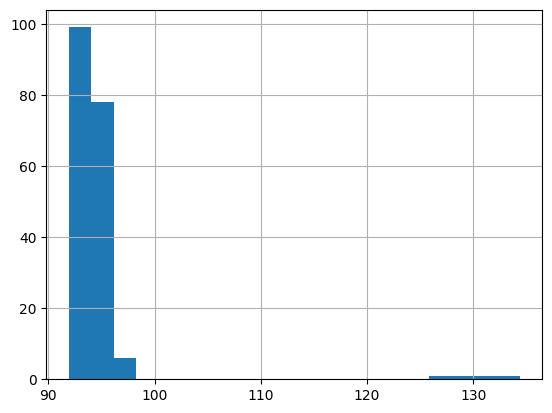

In [5]:
f1["LapTime"].hist(bins=20)

Parece que algunos bins aparecen muy a la derecha, son tiempos por vuelta inusualmente altos. 

Si nos concentramos solo en esta columna y la del nombre del piloto podemos ver si sucede para cada piloto

In [6]:
df_vueltas = f1[["LapNumber","LapTime","Driver"]]
df_vueltas

,LapNumber,LapTime,Driver
0,2,95.906,PER
1,3,94.829,PER
2,4,95.651,PER
3,5,94.873,PER
4,6,94.621,PER
...,...,...,...
182,46,92.982,RUS
183,47,92.901,RUS
184,48,92.756,RUS
185,49,93.135,RUS


Parece que un criterio sería encontrar bins con muy pocos valores, quizás tras varios "bins" vacíos. Para conocer el número de elementos en cada bin usaremos la función hist de plt, que nos devuelve estas frecuencias `n`, 

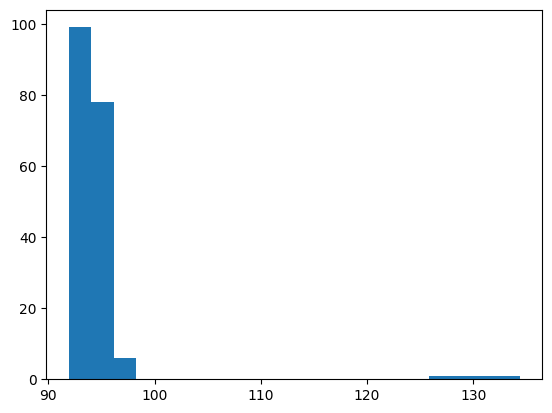

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 

(n, bins, patches)  = plt.hist(f1["LapTime"],bins=20)

In [8]:
n, len(n)

(array([99., 78.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  1.,  1.,  1.]),
 20)

In [9]:
bins, len(bins)

(array([ 91.906 ,  94.0281,  96.1502,  98.2723, 100.3944, 102.5165,
        104.6386, 106.7607, 108.8828, 111.0049, 113.127 , 115.2491,
        117.3712, 119.4933, 121.6154, 123.7375, 125.8596, 127.9817,
        130.1038, 132.2259, 134.348 ]),
 21)

Parece por tanto que a partir de 125.8596, hay outliers, vamos a ver estos valores

In [10]:
limite = 125.8596
filtro = f1["LapTime"] > limite
f1[filtro]

,LapTime,LapNumber,PitInTime,Sector1Time,Sector2Time,Sector3Time,SpeedST,Compound,TyreLife,Team,Driver
16,127.357,18,0 days 01:31:46.882000,39.183,47.443,40.731,282.0,MEDIUM,18.0,Red Bull Racing,PER
62,134.348,18,0 days 01:32:15.366000,48.991,40.059,45.298,197.0,MEDIUM,18.0,Red Bull Racing,VER
109,129.623,18,0 days 01:31:55.100000,39.863,43.937,45.823,186.0,MEDIUM,18.0,Aston Martin,ALO
156,132.217,18,0 days 01:32:05.756000,43.181,42.922,46.114,241.0,MEDIUM,18.0,Mercedes,RUS


In [11]:
f1[~filtro]

,LapTime,LapNumber,PitInTime,Sector1Time,Sector2Time,Sector3Time,SpeedST,Compound,TyreLife,Team,Driver
0,95.906,2,0,35.785,29.903,30.218,316.0,MEDIUM,2.0,Red Bull Racing,PER
1,94.829,3,0,35.340,29.825,29.664,334.0,MEDIUM,3.0,Red Bull Racing,PER
2,95.651,4,0,35.484,30.147,30.020,307.0,MEDIUM,4.0,Red Bull Racing,PER
3,94.873,5,0,35.024,29.903,29.946,312.0,MEDIUM,5.0,Red Bull Racing,PER
4,94.621,6,0,34.934,29.815,29.872,310.0,MEDIUM,6.0,Red Bull Racing,PER
...,...,...,...,...,...,...,...,...,...,...,...
182,92.982,46,0,34.188,29.299,29.495,303.0,HARD,28.0,Mercedes,RUS
183,92.901,47,0,34.167,29.235,29.499,306.0,HARD,29.0,Mercedes,RUS
184,92.756,48,0,33.841,29.174,29.741,299.0,HARD,30.0,Mercedes,RUS
185,93.135,49,0,34.245,29.248,29.642,305.0,HARD,31.0,Mercedes,RUS


Parece mostrarnos que los outliers coinciden justo con cuando PitInTime !=0, que es cuando han entrado a cambiar neumáticos

In [12]:
f1[f1.PitInTime!=0]

,LapTime,LapNumber,PitInTime,Sector1Time,Sector2Time,Sector3Time,SpeedST,Compound,TyreLife,Team,Driver
0,95.906,2,0,35.785,29.903,30.218,316.0,MEDIUM,2.0,Red Bull Racing,PER
1,94.829,3,0,35.340,29.825,29.664,334.0,MEDIUM,3.0,Red Bull Racing,PER
2,95.651,4,0,35.484,30.147,30.020,307.0,MEDIUM,4.0,Red Bull Racing,PER
3,94.873,5,0,35.024,29.903,29.946,312.0,MEDIUM,5.0,Red Bull Racing,PER
4,94.621,6,0,34.934,29.815,29.872,310.0,MEDIUM,6.0,Red Bull Racing,PER
...,...,...,...,...,...,...,...,...,...,...,...
182,92.982,46,0,34.188,29.299,29.495,303.0,HARD,28.0,Mercedes,RUS
183,92.901,47,0,34.167,29.235,29.499,306.0,HARD,29.0,Mercedes,RUS
184,92.756,48,0,33.841,29.174,29.741,299.0,HARD,30.0,Mercedes,RUS
185,93.135,49,0,34.245,29.248,29.642,305.0,HARD,31.0,Mercedes,RUS


Veamos los histogramas sin  outliers 

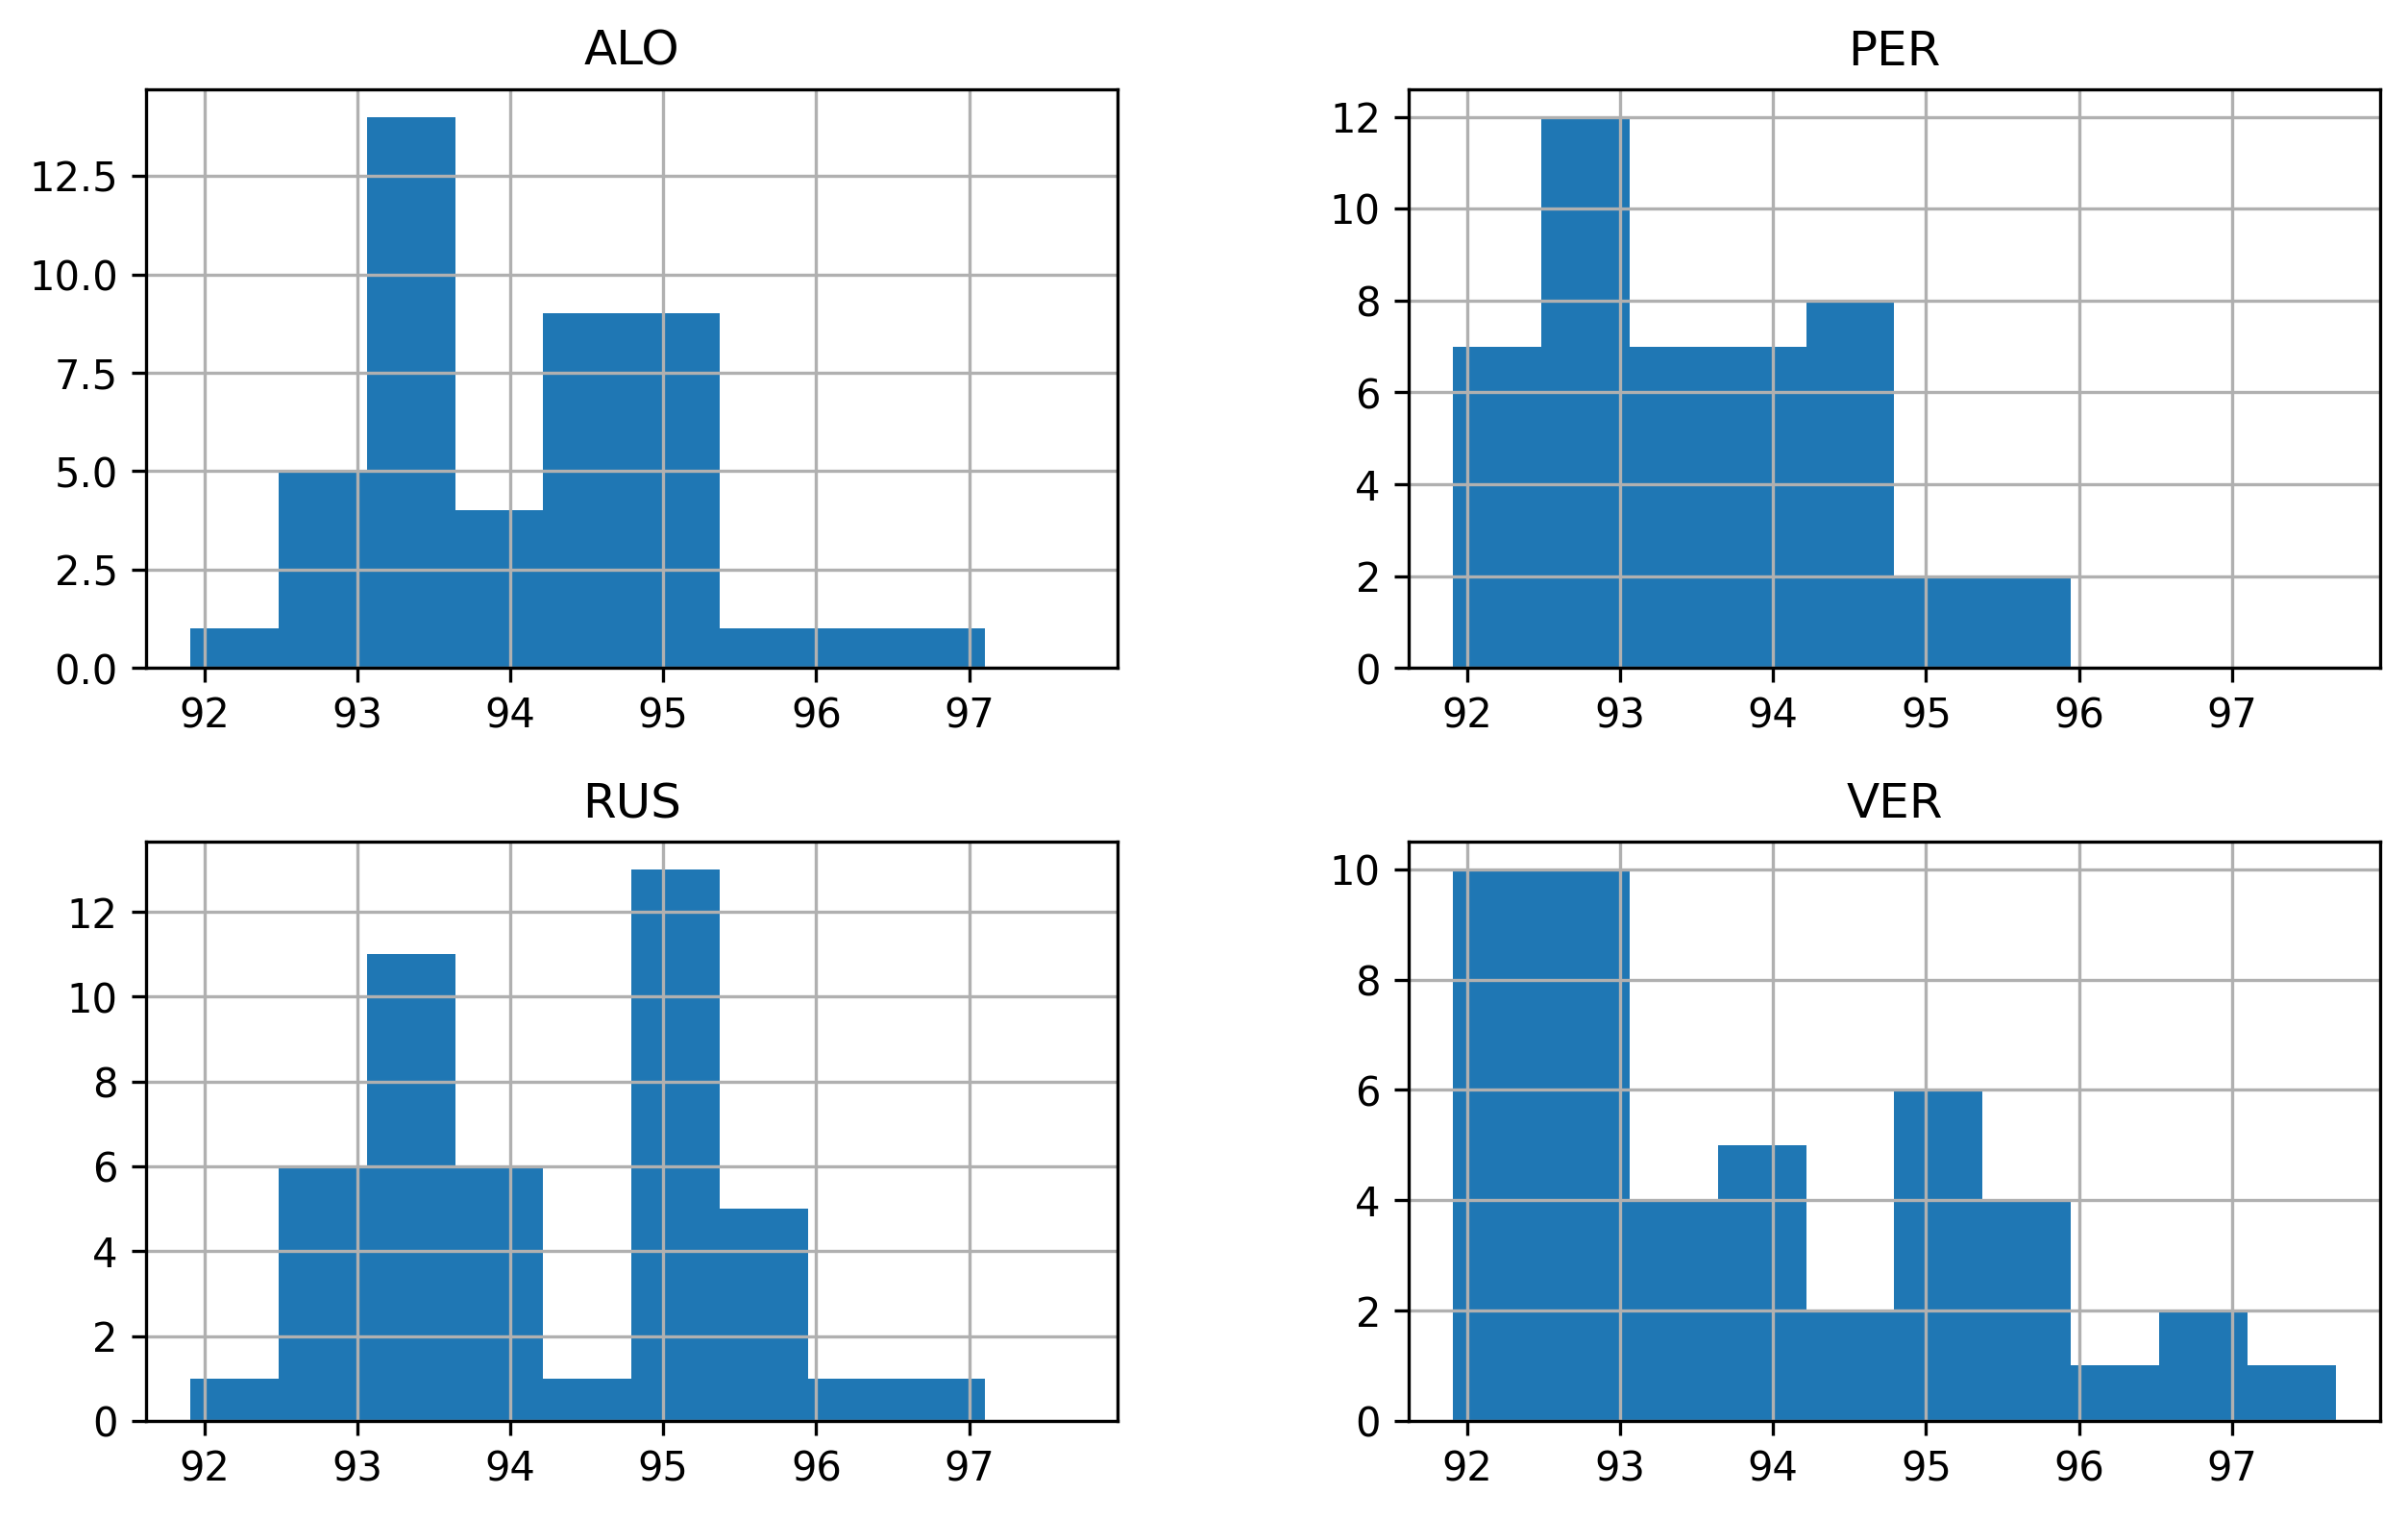

In [13]:

df_vueltas = f1.loc[~filtro,["LapNumber","LapTime","Driver"]]
fig, ax = plt.subplots(2,2,figsize=(10, 6),dpi=300)

df_pilotos = df_vueltas.pivot(index="LapNumber", columns="Driver", values="LapTime").dropna()
df_pilotos.hist(ax=ax, range=[df_vueltas.LapTime.min() , df_vueltas.LapTime.max()])
plt.show()

<a name="Boxplots"></a>
### Boxplots

Sin embargo hay otro método que se utiliza más a menudo porque además da más información: los boxplots (también llamados en castellano "diagramas de cajas y bigotes"). Están basados en la mediana y muestran la siguiente información:

<img src="https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png" width=600/>

El criterio para declarar algo como outlier es por tanto ser  $< Q_1 - 1.5 \times (Q_3- Q_1)$  o  bien $> Q_3 + 1.5 \times (Q_3- Q_1)$

Se trata de un criterio bastante exigente porque en el caso de una normal suma más del 99% de la población

<img src="https://miro.medium.com/max/8100/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width=600/>

En Python se pueden mostrar tanto con pandas, como con matplotlib como con seaborn.

Con **Pandas**:

In [14]:
f1.iloc[0,0]=80
f1

,LapTime,LapNumber,PitInTime,Sector1Time,Sector2Time,Sector3Time,SpeedST,Compound,TyreLife,Team,Driver
0,80.000,2,0,35.785,29.903,30.218,316.0,MEDIUM,2.0,Red Bull Racing,PER
1,94.829,3,0,35.340,29.825,29.664,334.0,MEDIUM,3.0,Red Bull Racing,PER
2,95.651,4,0,35.484,30.147,30.020,307.0,MEDIUM,4.0,Red Bull Racing,PER
3,94.873,5,0,35.024,29.903,29.946,312.0,MEDIUM,5.0,Red Bull Racing,PER
4,94.621,6,0,34.934,29.815,29.872,310.0,MEDIUM,6.0,Red Bull Racing,PER
...,...,...,...,...,...,...,...,...,...,...,...
182,92.982,46,0,34.188,29.299,29.495,303.0,HARD,28.0,Mercedes,RUS
183,92.901,47,0,34.167,29.235,29.499,306.0,HARD,29.0,Mercedes,RUS
184,92.756,48,0,33.841,29.174,29.741,299.0,HARD,30.0,Mercedes,RUS
185,93.135,49,0,34.245,29.248,29.642,305.0,HARD,31.0,Mercedes,RUS


<Axes: >

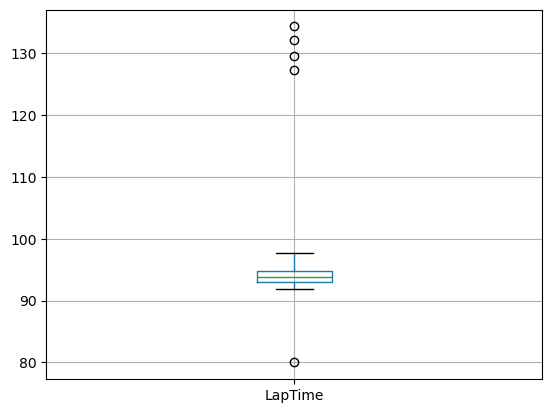

In [15]:
f1.boxplot(column = "LapTime")

<Axes: title={'center': 'LapTime'}, xlabel='Driver'>

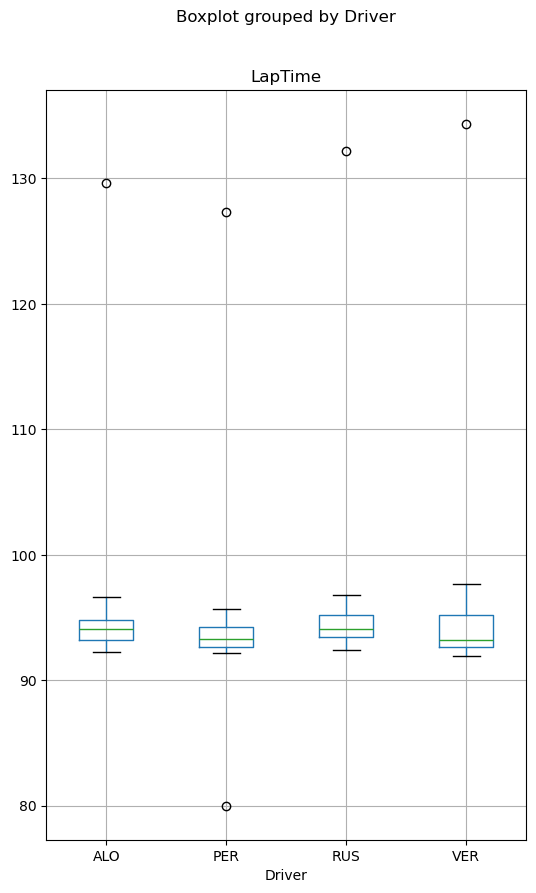

In [16]:
fig, ax = plt.subplots(figsize=(6, 10),dpi=100)
f1.boxplot(column = "LapTime", by="Driver",ax=ax)

**matplotlib** Tiene la ventaja de poder incluir el "notch" que indica un intervalo de confianza para la mediana

[Ver aqui](https://i.sstatic.net/urPEC.jpg)


In [17]:
print(df_vueltas.head())
print(df_vueltas.pivot(index="LapNumber", columns="Driver", values="LapTime").head())

   LapNumber  LapTime Driver
0          2   95.906    PER
1          3   94.829    PER
2          4   95.651    PER
3          5   94.873    PER
4          6   94.621    PER
Driver        ALO     PER     RUS     VER
LapNumber                                
2          95.567  95.906  96.114  97.680
3          95.140  94.829  95.300  96.526
4          96.664  95.651  95.596  96.503
5          94.920  94.873  95.423  95.359
6          94.658  94.621  95.477  95.840


/var/folders/7y/7qbnckg175x_7bb72vdwtdkw0000gn/T/ipykernel_20751/1628003605.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df_pilotos.dropna(), notch = True,labels=df_pilotos.columns)


{'whiskers': [<matplotlib.lines.Line2D at 0x157d52390>,
 'caps': [<matplotlib.lines.Line2D at 0x157d528a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x157d51220>,
 'medians': [<matplotlib.lines.Line2D at 0x157d52de0>,
 'fliers': [<matplotlib.lines.Line2D at 0x157d530b0>,
 'means': []}

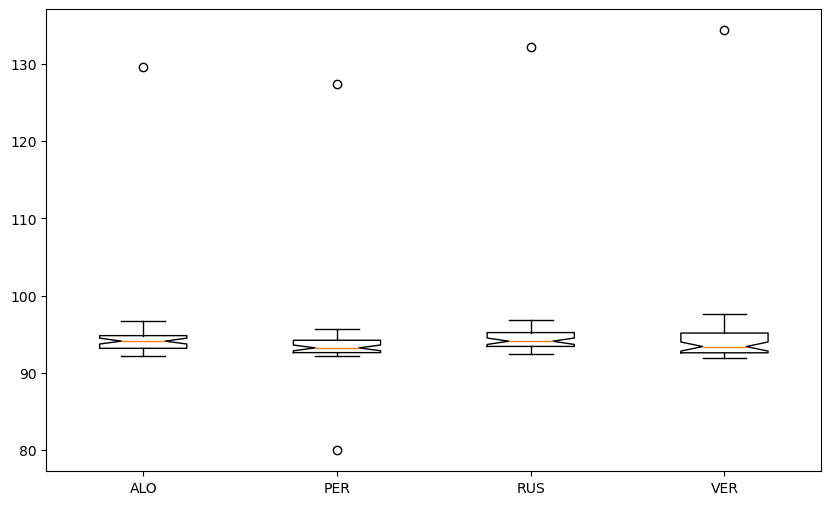

In [18]:
df_vueltas = f1[["LapNumber","LapTime","Driver"]]

df_pilotos = df_vueltas.pivot(index="LapNumber", columns="Driver", values="LapTime")

fig, ax = plt.subplots(figsize=(10, 6),dpi=100)
ax.boxplot(df_pilotos.dropna(), notch = True,labels=df_pilotos.columns)


Un poco más bonito

/var/folders/7y/7qbnckg175x_7bb72vdwtdkw0000gn/T/ipykernel_20751/3476354781.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplots = ax.boxplot(df_pilotos.dropna(), notch = True,labels=df_pilotos.columns,


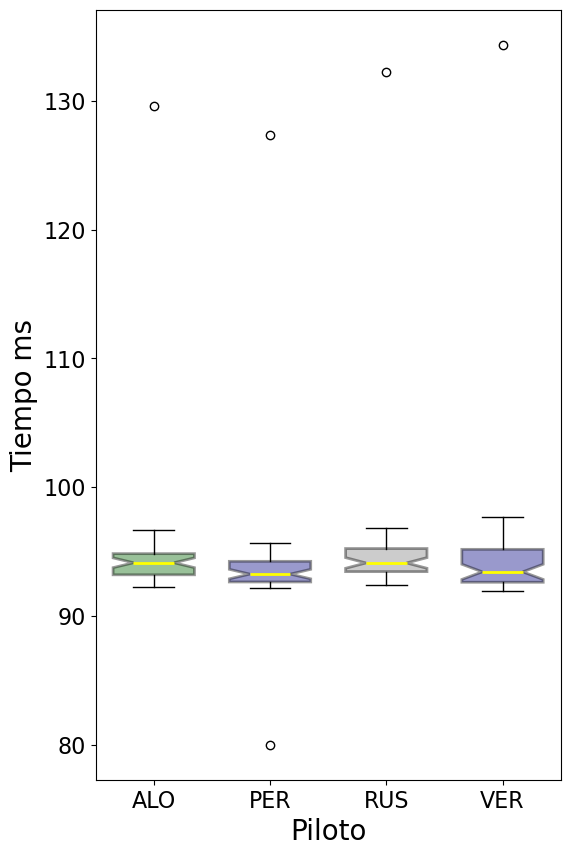

In [19]:
fig, ax = plt.subplots(figsize=(6, 10),dpi=100)
boxplots = ax.boxplot(df_pilotos.dropna(), notch = True,labels=df_pilotos.columns,
             widths = .7,
             patch_artist=True,
             medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
             boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4))
# colores
boxplots['boxes'][0].set_facecolor('darkgreen')
boxplots['boxes'][1].set_facecolor('navy')
boxplots['boxes'][2].set_facecolor('grey')
boxplots['boxes'][3].set_facecolor('navy')

plt.ylabel('Tiempo ms', fontsize = 20)
plt.xlabel('Piloto', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

**Seaborn**

<Axes: xlabel='LapTime'>

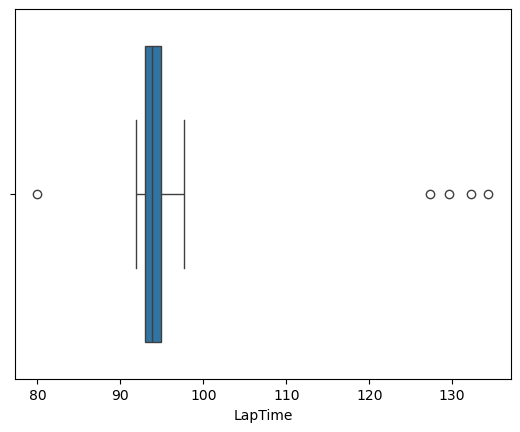

In [20]:
import seaborn as sns
sns.boxplot(x=f1["LapTime"])

<Axes: xlabel='LapTime', ylabel='Driver'>

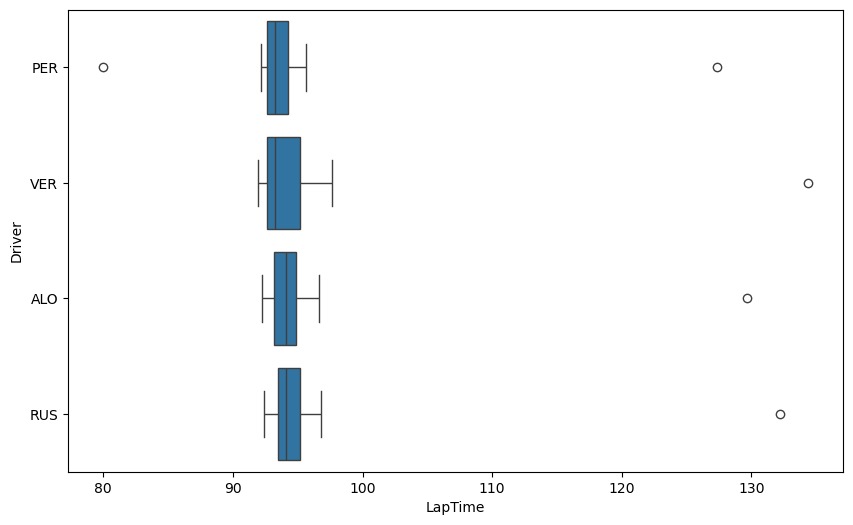

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 6),dpi=100)
sns.boxplot(x=f1["LapTime"],y=f1["Driver"])

<Axes: xlabel='LapTime', ylabel='Compound'>

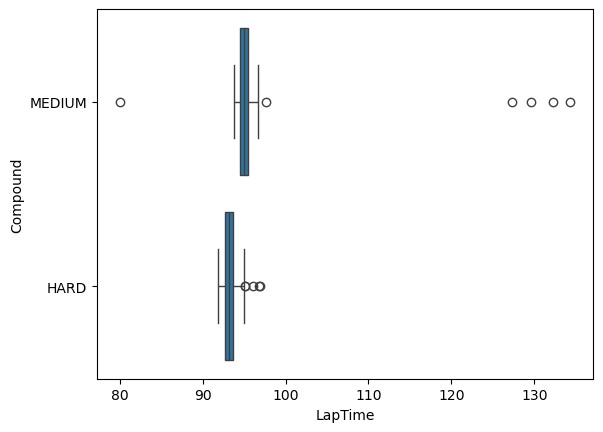

In [22]:
sns.boxplot(x=f1["LapTime"],y=f1["Compound"])

In [23]:
columns = ['Sector1Time', 'Sector2Time', 'Sector3Time', 'Driver',"LapNumber"]
df_sectores = pd.melt(f1[~filtro][columns], id_vars=['Driver','LapNumber'])
df_sectores

,Driver,LapNumber,variable,value
0,PER,2,Sector1Time,35.785
1,PER,3,Sector1Time,35.340
2,PER,4,Sector1Time,35.484
3,PER,5,Sector1Time,35.024
4,PER,6,Sector1Time,34.934
...,...,...,...,...
544,RUS,46,Sector3Time,29.495
545,RUS,47,Sector3Time,29.499
546,RUS,48,Sector3Time,29.741
547,RUS,49,Sector3Time,29.642


<Axes: xlabel='value', ylabel='variable'>

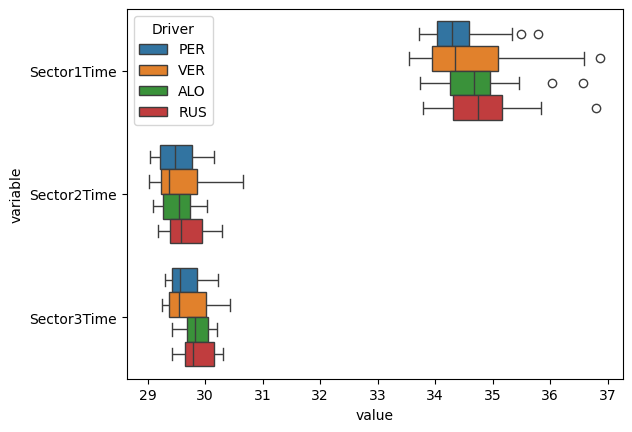

In [24]:
sns.boxplot(data = df_sectores, x="value",y="variable",hue="Driver")

<a name="Numéricos"></a>
## Métodos numéricos

El primero ya lo hemos visto y es el que utilizan los boxplots; un valor x se considera outlier si 

$x< Q_1 - 1.5 \times (Q_3- Q_1)$  o  bien $x> Q_3 + 1.5 \times (Q_3- Q_1)$

Solo nos falta poder calcular $Q_1, Q_3$, pero el método `quantile`de Pandas lo pone muy fácil. Vamos a obtener los outliers para cada piloto:

In [25]:
df_vueltas = f1[["LapNumber","LapTime","Driver"]]

df_pilotos = df_vueltas.pivot(index="LapNumber", columns="Driver", values="LapTime")

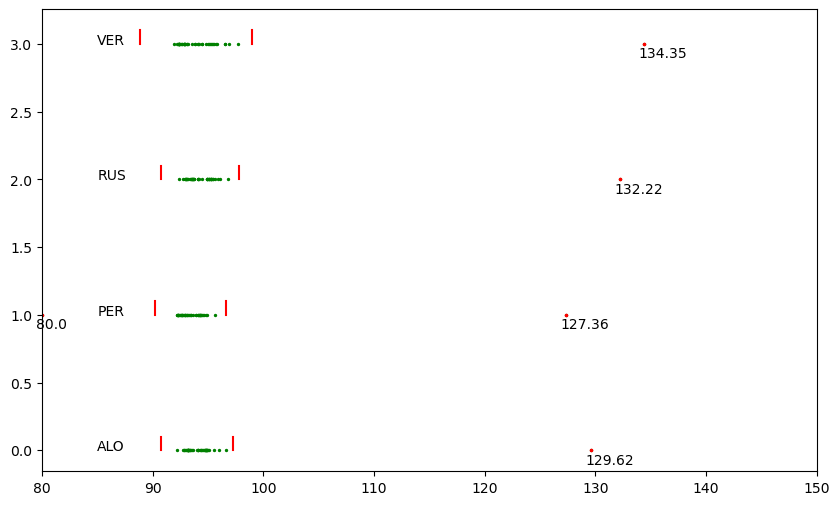

In [26]:
def muestra(ax, x,inferior,superior,c):
    filtro_menor = x < inferior
    filtro_mayor = x > superior
    outliers = np.concatenate( (x[filtro_menor].values,x[filtro_mayor].values))

    #Mostramos los valores válidos
    ax.scatter(x, [i]*len(x),color="green",s=2)
    
    # señalamos el límite inferior y superior
    ax.plot([inferior, inferior], [i,i+0.1],color="red")
    ax.plot([superior, superior], [i,i+0.1],color="red")

    
    # ahora cada outlier
    for o in outliers:
        ax.scatter([o],[i],color="red",s=2.5) 
        plt.text(o-0.5,i-0.1,round(o,2))

    plt.text(85, i, c)
    return
    
    

fig, ax = plt.subplots(figsize=(10, 6),dpi=100)
for i, driver in enumerate(df_pilotos.columns):
    x = df_pilotos[driver].dropna()
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    inferior = q1 - 1.5*(q3-q1)
    superior = q3 + 1.5*(q3-q1)
    muestra(ax,x,inferior,superior,driver)
    

ax.set_xlim([80,150])
#ax.set_ylim([-1,len(df_pilotos.columns)])
plt.show()
        

Otro método, el llamado *Hampel X84*  utiliza la mediana y el mad para indicar que los puntos que están separados más de $1.4826 \times \theta\times MAD$ (*Median Absolute Deviation*) de la mediana son puntos extremos, donde $\theta$ es un número (1,2,3,4) que elegimos nosotros. Por ejemplo para $\theta=4$:

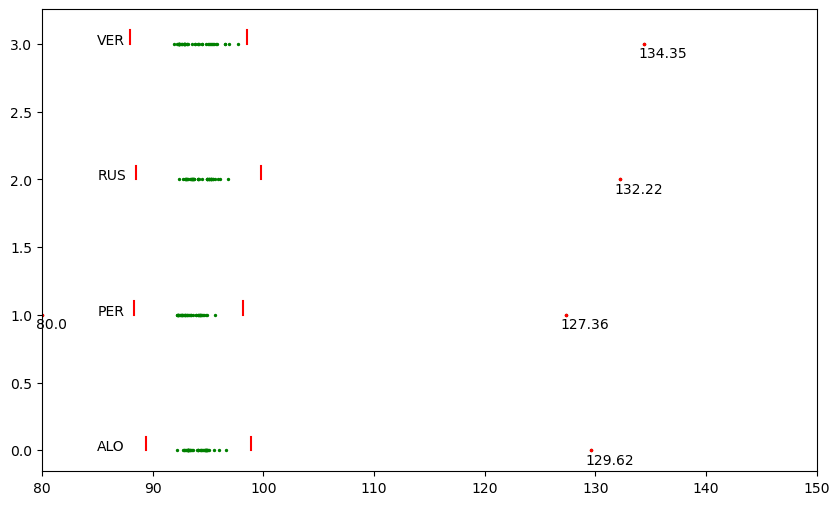

In [27]:
from scipy.stats import median_abs_deviation

fig, ax = plt.subplots(figsize=(10, 6),dpi=100)
for i, driver in enumerate(df_pilotos.columns):
    x = df_pilotos[driver].dropna()
    mediana = x.median()
    MAD = median_abs_deviation(x)
    theta = 4
    inferior = mediana -  1.4826*theta*MAD
    superior = mediana + 1.4826*theta*MAD

    muestra(ax,x,inferior,superior,driver)

    

ax.set_xlim([80,150])
#ax.set_ylim([-1,len(df_pilotos.columns)])
plt.show()

<a name="Multivariante"></a>
## Outliers en varias dimensiones
Un outlier multivariado es un punto de datos que no parece anómalo en ninguna variable individual, pero sí lo es cuando consideramos todas las variables juntas.

*Ejemplo Outliers en Múltiples Dimensiones*: Peso y Altura

| Persona | Peso (kg) | Altura (cm) |
|---------|-----------|-------------|
| A       | 70        | 175         |
| B       | 72        | 178         |
| C       | 69        | 173         |
| D       | 85        | 160 ❗       |

---

Consideramos ahora el siguiente dataframe:

In [30]:
### Create the Data
d1 = np.random.multivariate_normal(mean = np.array([-.5, 0]),
                               cov = np.array([[1, 0], [0, 1]]), size = 100)
d2 = np.random.multivariate_normal(mean = np.array([15, 10]),
                               cov = np.array([[1, 0.3], [.3, 1]]), size = 100)
outliers = np.array([[0, 10],[0, 9.5]])
df = pd.DataFrame(np.concatenate([d1, d2, outliers], axis = 0), columns = ['Var1', 'Var2'])
df

,Var1,Var2
0,0.621402,-1.657685
1,-0.051623,-1.710040
2,-1.689728,0.729854
3,-2.212050,-0.042045
4,-1.514558,-0.021866
...,...,...
197,14.865041,8.648265
198,14.484420,9.670341
199,14.995123,10.521550
200,0.000000,10.000000


usamos el método anterior



<Axes: >

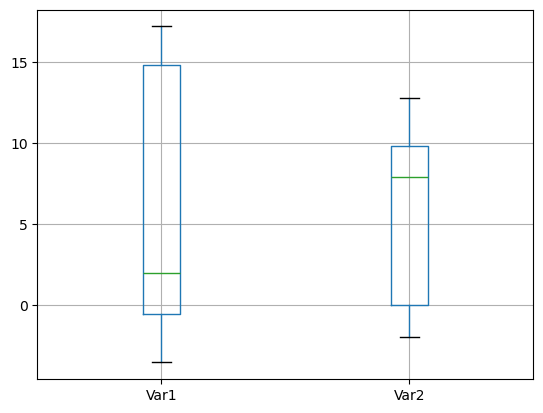

In [31]:
df.boxplot()

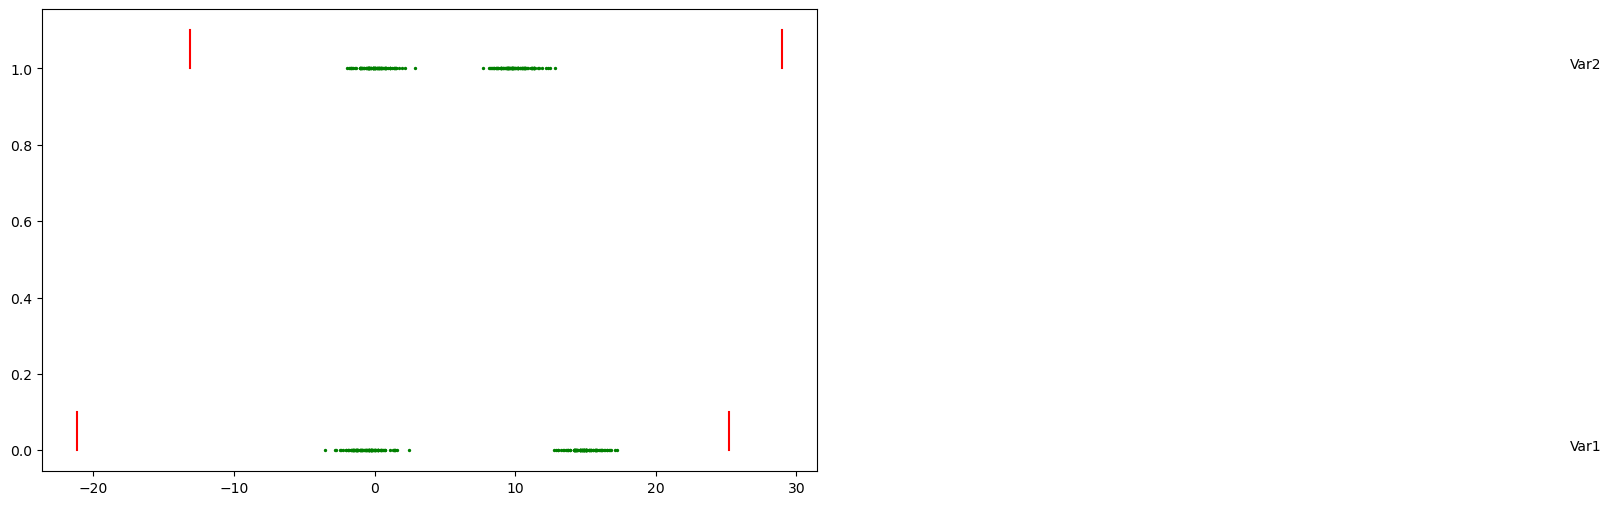

In [32]:
from scipy.stats import median_abs_deviation

fig, ax = plt.subplots(figsize=(10, 6),dpi=100)
for i, c in enumerate(df.columns):
    x = df[c].dropna()
    mediana = x.median()
    MAD = median_abs_deviation(x)
    inferior = mediana -  1.4826*3*MAD
    superior = mediana + 1.4826*3*MAD

    muestra(ax,x,inferior,superior,c)

    

#ax.set_ylim([-1,len(df_pilotos.columns)])
plt.show()

¡No hay ouliers! Seguro?

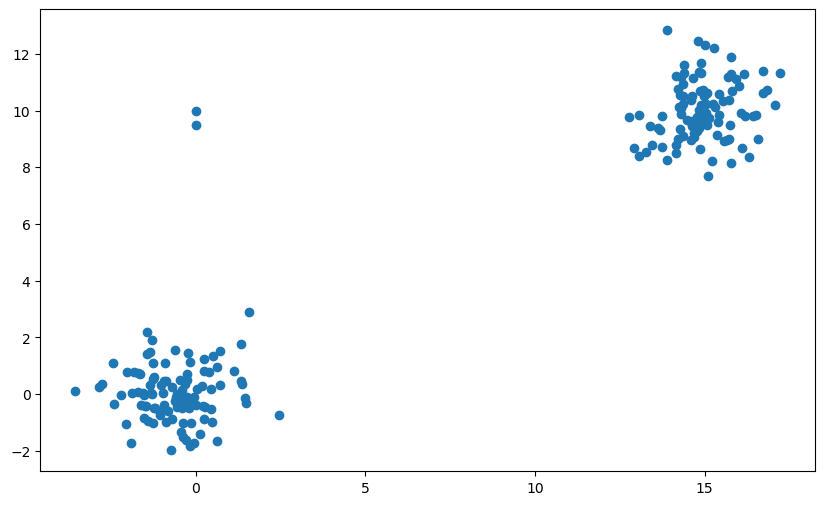

In [33]:
fig, ax = plt.subplots(figsize=(10, 6),dpi=100)
ax.scatter(df.Var1,df.Var2)

¿Cómo detectar estos puntos? La idea es que hay que tener una idea de punto "demasiado" alejado del resto, para eso utilizaremos 
la llamada [distancia de Mahalanobis](https://www.statisticshowto.com/mahalanobis-distance/) que tiene la distancia de un punto a un conjunto de puntos. Esto se hace mediante "envolturas elípticas" 

In [34]:
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=.1).fit(df)  # la contaminación es la proporción de outliers, la decidimos nosotros
ee # una "envoltura"

EllipticEnvelope()

In [35]:
p = ee.predict(df)
p # +1 normal, -1 outlier

array([-1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1])

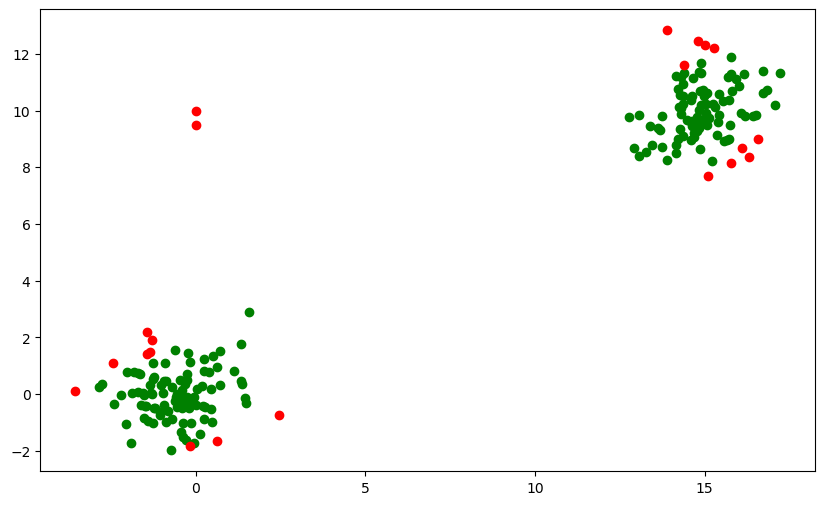

In [36]:
#Filtro para valores normales
filtro = p==+1
normales = df[filtro]
outliers = df[~filtro]
fig, ax = plt.subplots(figsize=(10, 6),dpi=100)
ax.scatter(normales.Var1,normales.Var2,color="green")
ax.scatter(outliers.Var1,outliers.Var2,color="red")


En el ejemplo de la f1:

In [37]:
df = df_pilotos.dropna()
ee = EllipticEnvelope(contamination=.01).fit(df)
p = ee.predict(df)
p

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [38]:
filtro = p==+1
normales = df[filtro]
outliers = df[~filtro]

outliers

Driver,ALO,PER,RUS,VER
LapNumber,,,,
2,95.567,80.0,96.114,97.68


Un aviso: No funciona bien si las funciones no siguen una normal ni aproximadamente

<a name="Bibliografía"></a>
## Bibliografía

[Notebook](https://github.com/mGalarnyk/Python_Tutorials/blob/master/Statistics/boxplot/Box_plot_interpretation.ipynb) con ejemplos de Boxplot incluyendo variantes como el "notch"

*Data Cleaning*. Ihab F. Ilyas and Xu Chu. Association for Computing Machinery 9781450371544 Tiene un capítulo dedicado a outliers muy completo


[Best Practices in Data Cleaning: A Complete Guide to Everything You Need to Do Before and After Collecting Your Data](http://pzs.dstu.dp.ua/DataMining/preprocessing/bibl/cleaning.pdf). Capítulo 7.
de Jason W. Osborne. Un poco técnico/estadístico pero muy preciso, 

[Outliers multivariante](https://medium.com/analytics-vidhya/anomaly-detection-in-python-part-1-basics-code-and-standard-algorithms-37d022cdbcff) Artículo de donde he tomado el código y el ejemplo para este apartado